# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
path=r'C:\Users\ANIL\Desktop\python\K Means'
os.chdir(path)

In [3]:
dataset=pd.read_csv('argentina.csv')
dataset.head(30)

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [4]:
dataset.shape

(22, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   province                22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              22 non-null     float64
 3   poverty                 22 non-null     float64
 4   deficient_infra         22 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           22 non-null     float64
 7   birth_mortal            22 non-null     float64
 8   pop                     22 non-null     int64  
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


In [6]:
dataset.isnull().sum()

province                  0
gdp                       0
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             0
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [7]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
def StrToFloat(x):
 dataset[x]=label_encoder.fit_transform(dataset[x])
 dataset[x].unique()
for i in dataset.columns:
 StrToFloat(i)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   province                22 non-null     int32
 1   gdp                     22 non-null     int64
 2   illiteracy              22 non-null     int64
 3   poverty                 22 non-null     int64
 4   deficient_infra         22 non-null     int64
 5   school_dropout          22 non-null     int64
 6   no_healthcare           22 non-null     int64
 7   birth_mortal            22 non-null     int64
 8   pop                     22 non-null     int64
 9   movie_theatres_per_cap  22 non-null     int64
 10  doctors_per_cap         22 non-null     int64
dtypes: int32(1), int64(10)
memory usage: 1.9 KB


In [9]:
dataset.columns

Index(['province', 'gdp', 'illiteracy', 'poverty', 'deficient_infra',
       'school_dropout', 'no_healthcare', 'birth_mortal', 'pop',
       'movie_theatres_per_cap', 'doctors_per_cap'],
      dtype='object')

In [10]:
features_orig = ['gdp', 'illiteracy', 'poverty', 'deficient_infra',
                 'school_dropout', 'no_healthcare', 'birth_mortal', 'pop',
                 'movie_theatres_per_cap', 'doctors_per_cap']

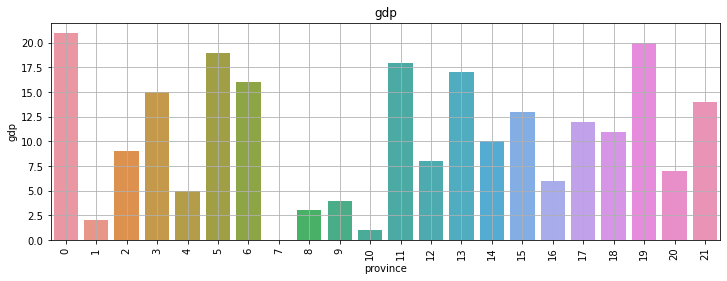

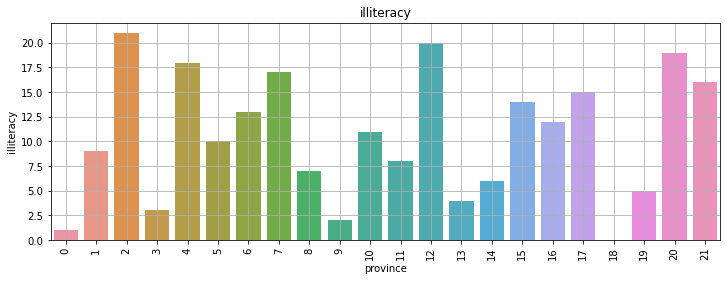

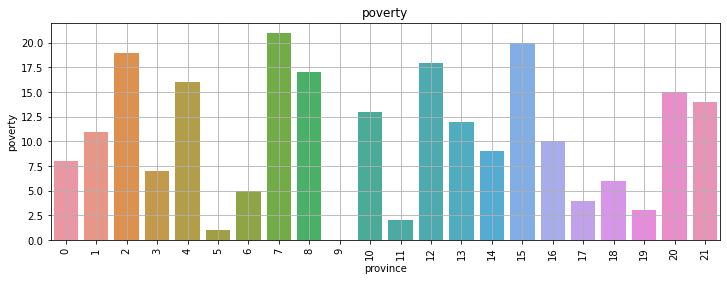

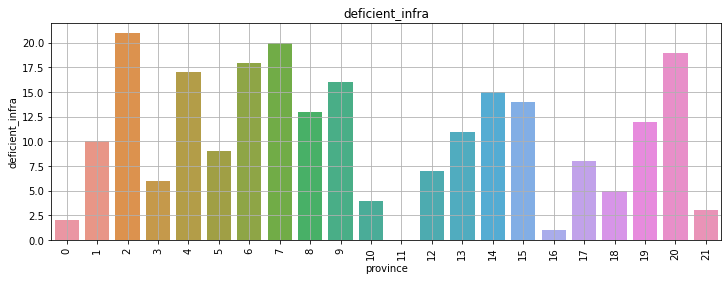

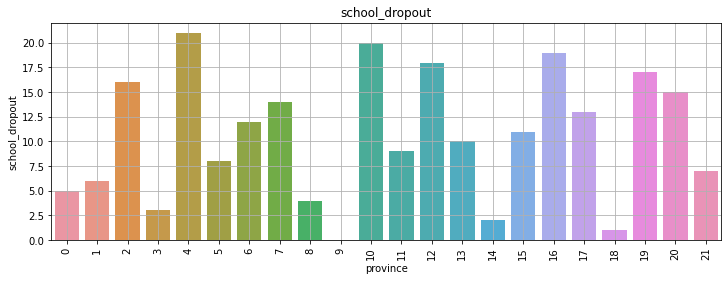

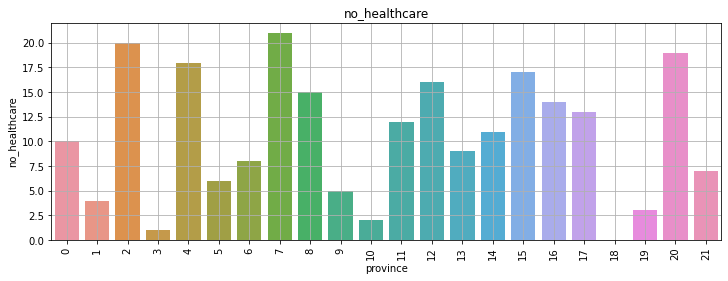

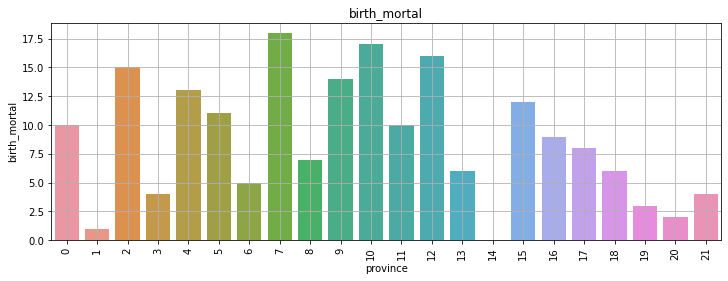

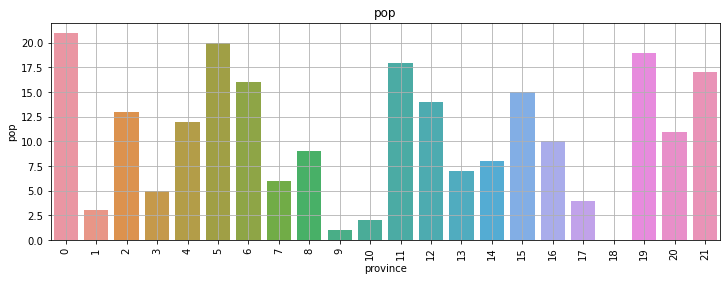

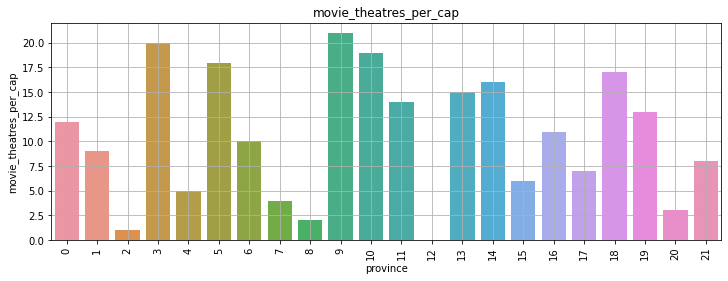

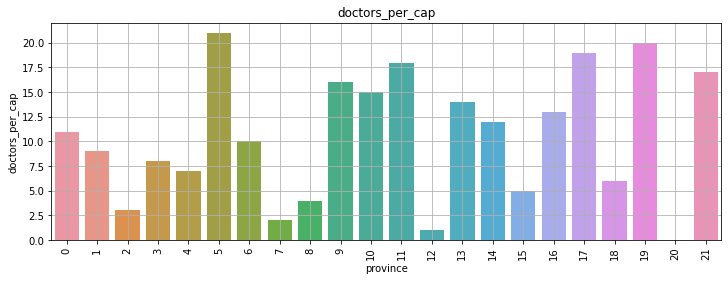

In [11]:
for f in features_orig:
    fig = plt.figure(figsize = (12,4))
    sns.barplot(x='province', y=f, data=dataset)
    plt.xticks(rotation=90) 
    plt.grid()
    plt.title(f)
    plt.show()

array([[<AxesSubplot:title={'center':'province'}>,
        <AxesSubplot:title={'center':'gdp'}>,
        <AxesSubplot:title={'center':'illiteracy'}>],
       [<AxesSubplot:title={'center':'poverty'}>,
        <AxesSubplot:title={'center':'deficient_infra'}>,
        <AxesSubplot:title={'center':'school_dropout'}>],
       [<AxesSubplot:title={'center':'no_healthcare'}>,
        <AxesSubplot:title={'center':'birth_mortal'}>,
        <AxesSubplot:title={'center':'pop'}>],
       [<AxesSubplot:title={'center':'movie_theatres_per_cap'}>,
        <AxesSubplot:title={'center':'doctors_per_cap'}>, <AxesSubplot:>]],
      dtype=object)

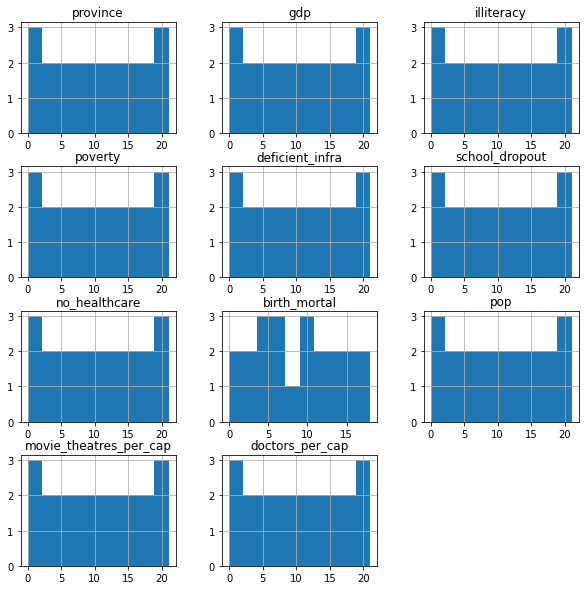

In [12]:
dataset.hist(figsize=(10,10))

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

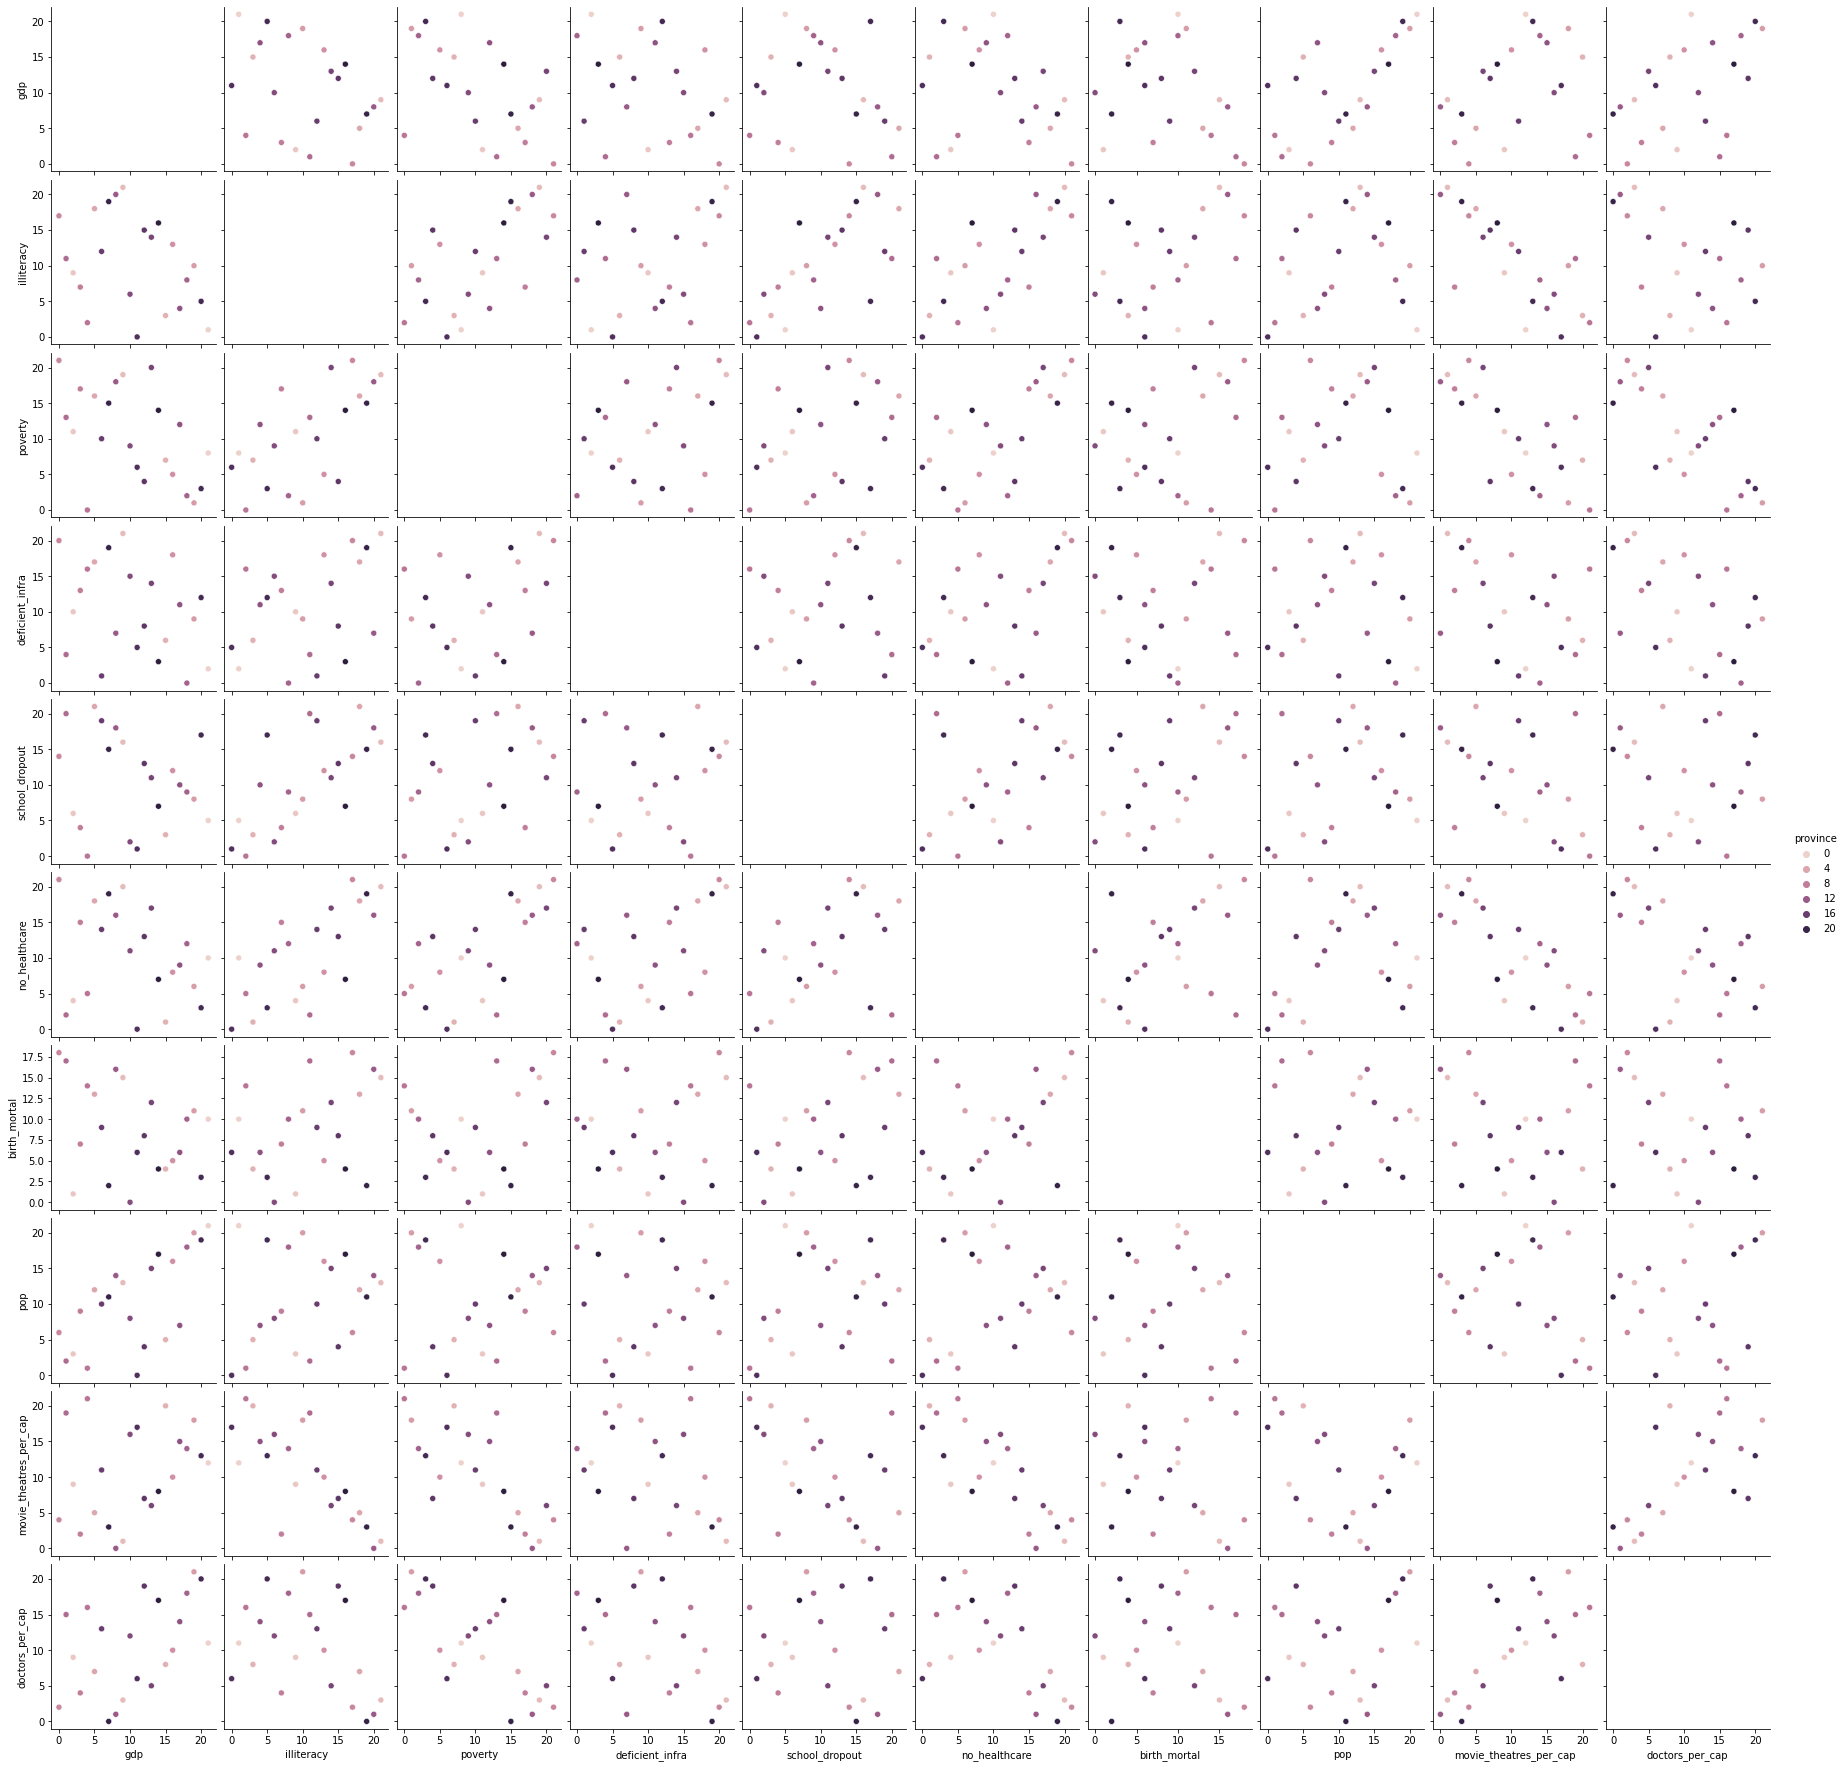

In [13]:
sns.pairplot(dataset,hue='province')

In [14]:
X = dataset.iloc[:, [8, 9]].values

In [15]:
dataset

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,0,21,1,8,2,5,10,10,21,12,11
1,1,2,9,11,10,6,4,1,3,9,9
2,5,19,10,1,9,8,6,11,20,18,21
3,4,5,18,16,17,21,18,13,12,5,7
4,2,9,21,19,21,16,20,15,13,1,3
5,3,15,3,7,6,3,1,4,5,20,8
6,6,16,13,5,18,12,8,5,16,10,10
7,7,0,17,21,20,14,21,18,6,4,2
8,8,3,7,17,13,4,15,7,9,2,4
9,9,4,2,0,16,0,5,14,1,21,16


## Using the elbow method to find the optimal number of clusters

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


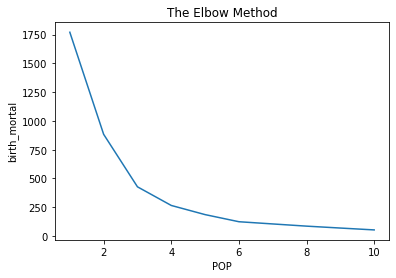

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('POP')
plt.ylabel('birth_mortal')
plt.show()

In [17]:
km = KMeans(n_clusters =5, n_jobs = 20, random_state=21)
km.fit(X)

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=20, random_state=21)

In [18]:
centers = km.cluster_centers_
print(centers)

[[18.5        12.5       ]
 [ 2.         19.25      ]
 [12.33333333  2.83333333]
 [ 4.33333333  6.66666667]
 [ 8.33333333 14.        ]]


In [19]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 4 2 0 0 3 2 4 0 3 3 2 0 1 1 0 1 4 3 2 0 2]


array([[12.33333333,  2.83333333],
       [ 8.33333333, 14.        ],
       [18.5       , 12.5       ],
       [ 2.        , 19.25      ],
       [ 4.33333333,  6.66666667]])

## Training the K-Means model on the dataset

In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

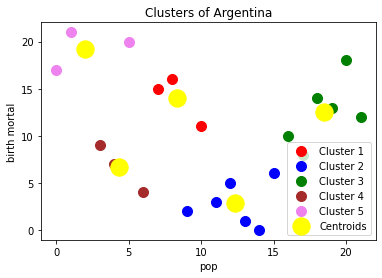

In [22]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'violet', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Argentina')
plt.xlabel('pop')
plt.ylabel('birth mortal')
plt.legend()
plt.show()